In [1]:
import csv
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Lambda, Dropout, Activation
from tensorflow.keras.layers import Conv2D, Cropping2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model

In [2]:
lines=[]
#with open('data/driving_log.csv') as csvfile:
with open('data\driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
lines=lines[1:]  
            
images=[]
measurements=[]
for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = os.path.join('data\IMG', filename)
    #current_path = 'data/IMG/' + filename    
    image = plt.imread(current_path)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #gray = gray[70:135, 0:]
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)
    images.append(cv2.flip(image, 1))
    measurements.append(measurement*-1)
print("DONE 1")    

for line in lines:
    source_path = line[1]
    filename = source_path.split('/')[-1]
    current_path = os.path.join('data\IMG', filename)
    #current_path = 'data/IMG/' + filename    
    image = plt.imread(current_path)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #gray = gray[70:135, 0:]
    images.append(image)
    measurement = float(line[3]) + float(0.2)
    measurements.append(measurement)
    images.append(cv2.flip(image, 1))
    measurements.append(measurement*-1)
print("DONE 2")
        
for line in lines:
    source_path = line[2]
    filename = source_path.split('/')[-1]
    current_path = os.path.join('data\IMG', filename)
    #current_path = 'data/IMG/' + filename    
    image = plt.imread(current_path)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #gray = gray[70:135, 0:]
    images.append(image)
    measurement = float(line[3]) - float(0.2)
    measurements.append(measurement)
    images.append(cv2.flip(image, 1))
    measurements.append(measurement*-1)    
print("DONE 3")    
    

DONE 1
DONE 2
DONE 3


In [3]:
X_train = np.array(images)
y_train = np.array(measurements)

print(X_train.shape)
print(y_train.shape)



(48216, 160, 320, 3)
(48216,)


In [4]:
# X_train = X_train[:,65:140,:]
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
# X_train.shape

In [5]:
# Custom Model
def Custom_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/255.0, input_shape=(160, 320, 3)))
    model.add(Cropping2D(cropping=((75,25),(0,0))))
    model.add(Conv2D(32, (3, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(84))
    model.add(Activation('relu'))
    model.add(Dense(1))

    return model


# Nvidia Model
def Nvidia_model(): 
    model = Sequential()
    model.add(Lambda(lambda x: x/255.0, input_shape=(160, 320, 3)))
    model.add(Cropping2D(cropping=((75,25),(0,0))))
    model.add(Convolution2D(24,5,5,subsample=(2,2),activation='relu'))
    model.add(Convolution2D(36,5,5,subsample=(2,2),activation='relu'))
    model.add(Convolution2D(48,5,5,subsample=(2,2),activation='relu'))
    model.add(Convolution2D(64,5,5,activation='relu'))
    model.add(Convolution2D(64,5,5,activation='relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
    
    return model

model = Custom_model()
#model = Nvidia_model()

In [6]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5)

Epoch 1/5
1206/1206 [==============================] - 750s 620ms/step - loss: 1.8341 - val_loss: 0.0357
Epoch 2/5
1206/1206 [==============================] - 777s 644ms/step - loss: 0.0234 - val_loss: 0.0300
Epoch 3/5
1206/1206 [==============================] - 784s 650ms/step - loss: 0.0165 - val_loss: 0.0293
Epoch 4/5
1206/1206 [==============================] - 754s 625ms/step - loss: 0.0142 - val_loss: 0.0297
Epoch 5/5
1206/1206 [==============================] - 1058s 878ms/step - loss: 0.0137 - val_loss: 0.0284


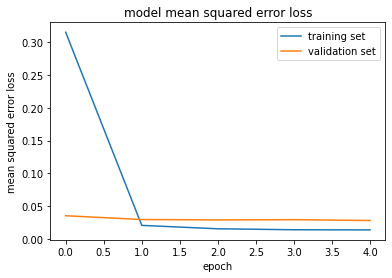

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()